## 라이브러리 로드

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# 윈도우 한글 깨짐
from matplotlib import font_manager, rc 
import matplotlib.font_manager as fm

for font_path in fm.findSystemFonts(fontpaths = None, fontext = 'ttf'):
    if 'D2Coding' in font_path:
        font = font_manager.FontProperties(fname=font_path).get_name()
        rc('font', family=font)
        break 

## 데이터 로드

In [4]:
DATA_PATH = '../../../data/titanic/'
df = pd.read_csv(DATA_PATH + 'train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
df.shape, df.columns

((891, 12),
 Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
        'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
       dtype='object'))

In [7]:
# 소문자로 변환
df.columns = [col.lower() for col in df.columns]
df.columns

Index(['passengerid', 'survived', 'pclass', 'name', 'sex', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'cabin', 'embarked'],
      dtype='object')

### 데이터 확인

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   passengerid  891 non-null    int64  
 1   survived     891 non-null    int64  
 2   pclass       891 non-null    int64  
 3   name         891 non-null    object 
 4   sex          891 non-null    object 
 5   age          714 non-null    float64
 6   sibsp        891 non-null    int64  
 7   parch        891 non-null    int64  
 8   ticket       891 non-null    object 
 9   fare         891 non-null    float64
 10  cabin        204 non-null    object 
 11  embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
df.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
df.describe()

,passengerid,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### 타겟 데이터 확인

In [14]:
new_survived = pd.Categorical(df['survived'])
new_survived = new_survived.rename_categories(['Died', 'Survived'])
new_survived.describe()

,counts,freqs
categories,,
Died,549,0.616162
Survived,342,0.383838


### EDA

In [27]:
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

cabin          0.771044
age            0.198653
embarked       0.002245
passengerid    0.000000
survived       0.000000
pclass         0.000000
name           0.000000
sex            0.000000
sibsp          0.000000
parch          0.000000
ticket         0.000000
fare           0.000000
dtype: float64

In [18]:
df.skew(), df.kurt()

C:\Users\Playdata\AppData\Local\Temp\ipykernel_10912\2428959278.py:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew(), df.kurt()
C:\Users\Playdata\AppData\Local\Temp\ipykernel_10912\2428959278.py:1: FutureWarning: The default value of numeric_only in DataFrame.kurt is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew(), df.kurt()


(passengerid    0.000000
 survived       0.478523
 pclass        -0.630548
 age            0.389108
 sibsp          3.695352
 parch          2.749117
 fare           4.787317
 dtype: float64,
 passengerid    -1.200000
 survived       -1.775005
 pclass         -1.280015
 age             0.178274
 sibsp          17.880420
 parch           9.778125
 fare           33.398141
 dtype: float64)

<AxesSubplot: ylabel='Frequency'>

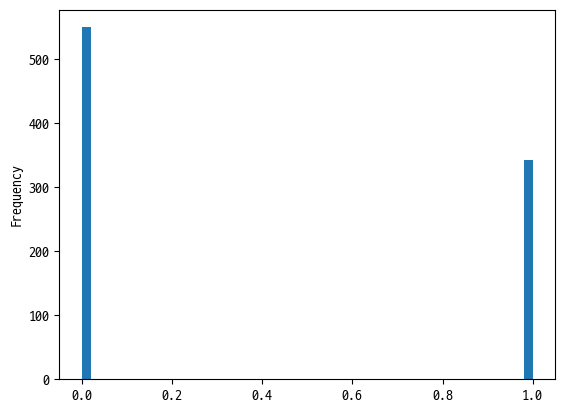

In [31]:
df['survived'].plot.hist(bins=50)

In [19]:
df_number = df.select_dtypes(include=np.number)
df_number.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   passengerid  891 non-null    int64  
 1   survived     891 non-null    int64  
 2   pclass       891 non-null    int64  
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
dtypes: float64(2), int64(5)
memory usage: 48.9 KB


In [21]:
df_number = df.select_dtypes(exclude=np.number)
df_number.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   name      891 non-null    object
 1   sex       891 non-null    object
 2   ticket    891 non-null    object
 3   cabin     204 non-null    object
 4   embarked  889 non-null    object
dtypes: object(5)
memory usage: 34.9+ KB


### 데이터 분리

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
SEED = 42

X_tr, X_te = train_test_split(df, random_state=SEED, test_size=0.2)
X_tr = X_tr.reset_index(drop=True)
X_te = X_te.reset_index(drop=True)

X_tr.shape, X_te.shape

((712, 12), (179, 12))

In [32]:
# train data set의 survived 컬럼 카테고리 이름을 변경하여 파악
new_survived = pd.Categorical(X_tr['survived'])
new_survived = new_survived.rename_categories(['Died', 'Survived'])
print(new_survived[:5])

['Died', 'Died', 'Died', 'Died', 'Died']
Categories (2, object): ['Died', 'Survived']


In [33]:
new_survived.describe()

,counts,freqs
categories,,
Died,444,0.623596
Survived,268,0.376404


## Data Cleaning

### 필요 없는 데이터 

In [34]:
X_tr['passengerid'].nunique(), X_tr.shape[0]

(712, 712)

In [35]:
# passengerid를 드랍한다.
X_tr.drop('passengerid', axis=1, inplace=True)
X_te.drop('passengerid', axis=1, inplace=True)

In [36]:
X_tr.columns

Index(['survived', 'pclass', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked'],
      dtype='object')

### 결측치 처리

In [40]:
(X_tr.isnull().sum() / X_tr.shape[0]).round(4).sort_values(ascending=False)

cabin       0.7767
age         0.1966
embarked    0.0028
survived    0.0000
pclass      0.0000
name        0.0000
sex         0.0000
sibsp       0.0000
parch       0.0000
ticket      0.0000
fare        0.0000
dtype: float64

In [41]:
print(f'before: {X_tr.shape} / isnull().sum(): {X_tr.isnull().sum().sum()}')
# 결측치가 있는 행 제거 : X_tr.dropna(axis=0)
X_tr = X_tr.drop('cabin', axis=1)
X_te = X_te.drop('cabin', axis=1)
print(f'after: {X_tr.shape} / isnull().sum(): {X_tr.isnull().sum().sum()}')

before: (712, 11) / isnull().sum(): 695
after: (712, 10) / isnull().sum(): 142


In [42]:
# age 컬럼의 결측치는 중앙값으로 채운다.
X_tr['age'] = X_tr['age'].fillna(X_tr['age'].median())
X_te['age'] = X_te['age'].fillna(X_tr['age'].median())

In [43]:
#embarked의 결측치는 최빈값으로 채운다.
embarked_mode = X_tr['embarked'].mode().values[0]

X_tr['embarked'] = X_tr['embarked'].fillna(embarked_mode)
X_te['embarked'] = X_te['embarked'].fillna(embarked_mode)

In [44]:
# 결측치가 모두 사라졌다는 것을 확인할 수 있다.
X_tr.isnull().sum().sum(), X_te.isnull().sum().sum()

(0, 0)

## Feature Extraction
기존 Feature에 기반해 새로운 Feature 생성

### 데이터 타입

In [45]:
X_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712 entries, 0 to 711
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  712 non-null    int64  
 1   pclass    712 non-null    int64  
 2   name      712 non-null    object 
 3   sex       712 non-null    object 
 4   age       712 non-null    float64
 5   sibsp     712 non-null    int64  
 6   parch     712 non-null    int64  
 7   ticket    712 non-null    object 
 8   fare      712 non-null    float64
 9   embarked  712 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 55.8+ KB


#### 수치형 데이터 타입 변환

In [50]:
df_number = X_tr.select_dtypes(include=np.number)
df_number.columns

Index(['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare'], dtype='object')

In [51]:
df_number.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712 entries, 0 to 711
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  712 non-null    int64  
 1   pclass    712 non-null    int64  
 2   age       712 non-null    float64
 3   sibsp     712 non-null    int64  
 4   parch     712 non-null    int64  
 5   fare      712 non-null    float64
dtypes: float64(2), int64(4)
memory usage: 33.5 KB


In [52]:
df_number.head()

,survived,pclass,age,sibsp,parch,fare
0,0,1,45.5,0,0,28.5000
1,0,2,23.0,0,0,13.0000
2,0,3,32.0,0,0,7.9250
3,0,3,26.0,1,0,7.8542
4,0,3,6.0,4,2,31.2750


In [53]:
df_number.describe()

,survived,pclass,age,sibsp,parch,fare
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,0.376404,2.330056,29.204129,0.553371,0.379213,32.586276
std,0.484824,0.824584,13.007971,1.176404,0.791669,51.969529
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.925000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,30.500000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [54]:
# survived 데이터를 더 작은 타입으로 변환 
X_tr['survived'] = X_tr['survived'].astype('int32')
X_te['survived'] = X_te['survived'].astype('int32')

In [56]:
# pclass가 범주형 데이터라는 것을 알 수 있다.
X_tr['pclass'].unique()

array([1, 2, 3], dtype=int64)

In [57]:
# pclass를 카테고리 타입으로 변환
X_tr['pclass'] = X_tr['pclass'].astype('category')
X_te['pclass'] = X_te['pclass'].astype('category')

In [58]:
# age 데이터를 정수 타입으로 변환 
X_tr['age'] = X_tr['age'].astype('int32')
X_te['age'] = X_te['age'].astype('int32')

In [59]:
# sibsp 데이터가 범주형인지 파악
df_number['sibsp'].unique()

array([0, 1, 4, 3, 2, 8, 5], dtype=int64)

In [60]:
# sibsp를 카테고리 타입으로 변환
X_tr['sibsp'] = X_tr['sibsp'].astype('category')
X_te['sibsp'] = X_te['sibsp'].astype('category')

In [61]:
# parch 데이터가 범주형인지 파악
df_number['parch'].unique()

array([0, 2, 1, 6, 4, 3, 5], dtype=int64)

In [62]:
# parch를 카테고리 타입으로 변환
X_tr['parch'] = X_tr['parch'].astype('category')
X_te['parch'] = X_te['parch'].astype('category')

In [63]:
# fare 데이터를 더 작은 실수 값으로 변환
X_tr['fare'] = X_tr['fare'].astype('float32')
X_te['fare'] = X_te['fare'].astype('float32')

In [64]:
X_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712 entries, 0 to 711
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   survived  712 non-null    int32   
 1   pclass    712 non-null    category
 2   name      712 non-null    object  
 3   sex       712 non-null    object  
 4   age       712 non-null    int32   
 5   sibsp     712 non-null    category
 6   parch     712 non-null    category
 7   ticket    712 non-null    object  
 8   fare      712 non-null    float32 
 9   embarked  712 non-null    object  
dtypes: category(3), float32(1), int32(2), object(4)
memory usage: 33.6+ KB


#### 범주형 데이터 타입 변환

In [65]:
df_object = X_tr.select_dtypes(include='object')
df_object.columns

Index(['name', 'sex', 'ticket', 'embarked'], dtype='object')

In [67]:
df_object.head()

,name,sex,ticket,embarked
0,"Partner, Mr. Austen",male,113043,S
1,"Berriman, Mr. William John",male,28425,S
2,"Tikkanen, Mr. Juho",male,STON/O 2. 3101293,S
3,"Hansen, Mr. Henrik Juul",male,350025,S
4,"Andersson, Miss. Ebba Iris Alfrida",female,347082,S


In [68]:
df_object.tail()

,name,sex,ticket,embarked
707,"Salkjelsvik, Miss. Anna Kristine",female,343120,S
708,"Cairns, Mr. Alexander",male,113798,S
709,"Hansen, Mr. Claus Peter",male,350026,S
710,"Carter, Miss. Lucile Polk",female,113760,S
711,"White, Mr. Richard Frasar",male,35281,S


In [71]:
# nuique의 수가 적은 것은 범주형이라고 할 수 있다.
df_object.describe()

,name,sex,ticket,embarked
count,712,712,712,712
unique,712,2,558,3
top,"Partner, Mr. Austen",male,CA. 2343,S
freq,1,467,7,527


In [66]:
df_object.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712 entries, 0 to 711
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   name      712 non-null    object
 1   sex       712 non-null    object
 2   ticket    712 non-null    object
 3   embarked  712 non-null    object
dtypes: object(4)
memory usage: 22.4+ KB


In [69]:
# sex를 범주형 데이터로 변경
X_tr['sex'] = X_tr['sex'].astype('category')
X_te['sex'] = X_te['sex'].astype('category')

In [70]:
# embarked를 범주형 데이터로 변경
X_tr['embarked'] = X_tr['embarked'].astype('category')
X_te['embarked'] = X_te['embarked'].astype('category')

In [72]:
X_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712 entries, 0 to 711
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   survived  712 non-null    int32   
 1   pclass    712 non-null    category
 2   name      712 non-null    object  
 3   sex       712 non-null    category
 4   age       712 non-null    int32   
 5   sibsp     712 non-null    category
 6   parch     712 non-null    category
 7   ticket    712 non-null    object  
 8   fare      712 non-null    float32 
 9   embarked  712 non-null    category
dtypes: category(5), float32(1), int32(2), object(2)
memory usage: 24.1+ KB


### 문자열

In [73]:
df_object = X_tr.select_dtypes(include='object')
df_object.columns

Index(['name', 'ticket'], dtype='object')

In [75]:
df_object.head()

,name,ticket
0,"Partner, Mr. Austen",113043
1,"Berriman, Mr. William John",28425
2,"Tikkanen, Mr. Juho",STON/O 2. 3101293
3,"Hansen, Mr. Henrik Juul",350025
4,"Andersson, Miss. Ebba Iris Alfrida",347082


In [76]:
df_object.describe()

,name,ticket
count,712,712
unique,712,558
top,"Partner, Mr. Austen",CA. 2343
freq,1,7


#### 문자열 공백 제거

In [77]:
# strip을 이용하여 앞뒤 공백제거를 한다.
X_tr['name'] = X_tr['name'].map(lambda x : x.strip())
X_te['name'] = X_te['name'].map(lambda x : x.strip())

X_tr['ticket'] = X_tr['ticket'].map(lambda x : x.strip())
X_te['ticket'] = X_te['ticket'].map(lambda x : x.strip())

#### 문자열 포함 여부

In [79]:
X_tr['name'].tail()

707    Salkjelsvik, Miss. Anna Kristine
708               Cairns, Mr. Alexander
709             Hansen, Mr. Claus Peter
710           Carter, Miss. Lucile Polk
711           White, Mr. Richard Frasar
Name: name, dtype: object

In [81]:
dict_designation = {
    'Mr.': '남성',
    'Master.': '남성',
    'Sir.': '남성',
    'Miss.': '미혼 여성',
    'Mrs.': '기혼 여성',
    'Ms.': '미혼/기혼 여성',
    'Lady.': '숙녀',
    'Mlle.': '아가씨',
    # 직업
    'Dr.': '의사',
    'Rev.': '목사',
    'Major.': '계급',
    'Don.': '교수',
    'Col.': '군인',
    'Capt.': '군인',
    # 귀족
    'Mme.': '영부인',
    'Countess.': '백작부인',
    'Jonkheer.': '귀족'
}


#변환 함수 생성
def add_designation(name) :
    designation = 'unknown'
    for key in dict_designation.keys() :
        if key in name :
            designation = key
            break
    return designation

X_tr['designation'] = X_tr['name'].map(lambda x : add_designation(x))
X_te['designation'] = X_te['name'].map(lambda x : add_designation(x))

X_tr.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked,designation
0,0,1,"Partner, Mr. Austen",male,45,0,0,113043,28.5000,S,Mr.
1,0,2,"Berriman, Mr. William John",male,23,0,0,28425,13.0000,S,Mr.
2,0,3,"Tikkanen, Mr. Juho",male,32,0,0,STON/O 2. 3101293,7.9250,S,Mr.
3,0,3,"Hansen, Mr. Henrik Juul",male,26,1,0,350025,7.8542,S,Mr.
4,0,3,"Andersson, Miss. Ebba Iris Alfrida",female,6,4,2,347082,31.2750,S,Miss.


In [83]:
# 호칭 데이터가 unkwon인 것이 있는지 확인
cond = X_tr['designation'] == 'unkwon'
X_tr.loc[cond].head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked,designation


In [84]:
cond = X_te['designation'] == 'unkwon'
X_te.loc[cond].head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked,designation


#### 문자열 분리

In [85]:
X_tr.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked,designation
0,0,1,"Partner, Mr. Austen",male,45,0,0,113043,28.5000,S,Mr.
1,0,2,"Berriman, Mr. William John",male,23,0,0,28425,13.0000,S,Mr.
2,0,3,"Tikkanen, Mr. Juho",male,32,0,0,STON/O 2. 3101293,7.9250,S,Mr.
3,0,3,"Hansen, Mr. Henrik Juul",male,26,1,0,350025,7.8542,S,Mr.
4,0,3,"Andersson, Miss. Ebba Iris Alfrida",female,6,4,2,347082,31.2750,S,Miss.


In [87]:
# last name을 분리해서 새로운 컬럼 생성
X_tr['last_name'] = X_tr['name'].map(lambda x : x.split(",")[0])
X_te['last_name'] = X_te['name'].map(lambda x : x.split(",")[0])

X_tr.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked,designation,last_name
0,0,1,"Partner, Mr. Austen",male,45,0,0,113043,28.5000,S,Mr.,Partner
1,0,2,"Berriman, Mr. William John",male,23,0,0,28425,13.0000,S,Mr.,Berriman
2,0,3,"Tikkanen, Mr. Juho",male,32,0,0,STON/O 2. 3101293,7.9250,S,Mr.,Tikkanen
3,0,3,"Hansen, Mr. Henrik Juul",male,26,1,0,350025,7.8542,S,Mr.,Hansen
4,0,3,"Andersson, Miss. Ebba Iris Alfrida",female,6,4,2,347082,31.2750,S,Miss.,Andersson


In [88]:
# 문자와 숫자가 섞여있는 컬럼
X_tr['ticket'].head()

0               113043
1                28425
2    STON/O 2. 3101293
3               350025
4               347082
Name: ticket, dtype: object

In [89]:
# ticket 컬럼에서 숫자만 분리하는 함수 생성
def add_ticket_number(ticket) :
    try :
        ticket_split = ticket.split(" ")[-1]
        return int(ticket_split)
    except :
        return 0

# 함수를 이용해 티켓 숫자만 분리된 컬럼 생성 후 형 변환
X_tr['ticket_number'] = X_tr['ticket'].map(lambda  x : add_ticket_number(x)).astype('int32')
X_te['ticket_number'] = X_te['ticket'].map(lambda x : add_ticket_number(x)).astype('int32')

X_tr.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked,designation,last_name,ticket_number
0,0,1,"Partner, Mr. Austen",male,45,0,0,113043,28.5000,S,Mr.,Partner,113043
1,0,2,"Berriman, Mr. William John",male,23,0,0,28425,13.0000,S,Mr.,Berriman,28425
2,0,3,"Tikkanen, Mr. Juho",male,32,0,0,STON/O 2. 3101293,7.9250,S,Mr.,Tikkanen,3101293
3,0,3,"Hansen, Mr. Henrik Juul",male,26,1,0,350025,7.8542,S,Mr.,Hansen,350025
4,0,3,"Andersson, Miss. Ebba Iris Alfrida",female,6,4,2,347082,31.2750,S,Miss.,Andersson,347082


### 집계

#### 피봇 테이블

In [92]:
# pclass에 따른 fare의 평균 값을 알아보기 위한 pivot table 
df_pivot = pd.pivot_table(X_tr, index='pclass', values='fare', aggfunc='mean').reset_index()
df_pivot.rename(columns = {'fare' : 'fare_mean_by_pclass'}, inplace=True)
df_pivot.head()

,pclass,fare_mean_by_pclass
0,1,89.253914
1,2,20.575939
2,3,13.934861


In [94]:
# datasaet에 pivot table을 merge한다
print(f"before : {X_tr.shape}")

# left를 사용하는 이유는 최대한 train data를 보존하기 위함이다. inner를 사용하면 null 값이 생성되는 것이 번거롭기도 함.
X_tr = pd.merge(X_tr, df_pivot, on='pclass', how='left')
X_te = pd.merge(X_te, df_pivot, on='pclass', how='left')
print(f'after : {X_tr.shape}')

before : (712, 13)
after : (712, 14)


In [101]:
X_tr.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked,designation,last_name,ticket_number,fare_mean_by_pclass
0,0,1,"Partner, Mr. Austen",male,45,0,0,113043,28.5000,S,Mr.,Partner,113043,89.253914
1,0,2,"Berriman, Mr. William John",male,23,0,0,28425,13.0000,S,Mr.,Berriman,28425,20.575939
2,0,3,"Tikkanen, Mr. Juho",male,32,0,0,STON/O 2. 3101293,7.9250,S,Mr.,Tikkanen,3101293,13.934861
3,0,3,"Hansen, Mr. Henrik Juul",male,26,1,0,350025,7.8542,S,Mr.,Hansen,350025,13.934861
4,0,3,"Andersson, Miss. Ebba Iris Alfrida",female,6,4,2,347082,31.2750,S,Miss.,Andersson,347082,13.934861


#### 그룹

In [102]:
# agg 함수에 적용할 딕셔너리 생성 
agg_dict = {'survived' : 'mean', 'sibsp' : 'nunique', 'parch' : 'nunique'}

# groupby를 pclass 기준으로 생성하고 컬럼 명을 바꿔준다
df_groupby = X_tr.groupby('pclass').agg(agg_dict).reset_index()
df_groupby.rename(columns = {'survived' : 'survived_by_plcass', 'sibsp' : 'len_sibsp_by_pclass', \
                                'parch' : 'len_parch_by_pclass'}, inplace=True)
df_groupby

,pclass,survived_by_plcass,len_sibsp_by_pclass,len_parch_by_pclass
0,1,0.607362,4,4
1,2,0.483444,4,4
2,3,0.241206,7,7


In [111]:
print(f'before: {X_tr.shape}')
X_tr = pd.merge(X_tr,df_groupby,how="left",on="pclass") 
X_te = pd.merge(X_te,df_groupby,how="left",on="pclass") 
print(f'after: {X_tr.shape}')
X_tr.head()

before: (712, 15)
after: (712, 18)


,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked,designation,last_name,ticket_number,fare_mean_by_pclass,sub_age,survived_by_plcass,len_sibsp_by_pclass,len_parch_by_pclass
0,0,1,"Partner, Mr. Austen",male,45,0,0,113043,28.5000,S,Mr.,Partner,113043,89.253914,4,0.607362,4,4
1,0,2,"Berriman, Mr. William John",male,23,0,0,28425,13.0000,S,Mr.,Berriman,28425,20.575939,2,0.483444,4,4
2,0,3,"Tikkanen, Mr. Juho",male,32,0,0,STON/O 2. 3101293,7.9250,S,Mr.,Tikkanen,3101293,13.934861,3,0.241206,7,7
3,0,3,"Hansen, Mr. Henrik Juul",male,26,1,0,350025,7.8542,S,Mr.,Hansen,350025,13.934861,2,0.241206,7,7
4,0,3,"Andersson, Miss. Ebba Iris Alfrida",female,6,4,2,347082,31.2750,S,Miss.,Andersson,347082,13.934861,0,0.241206,7,7


### 데이터 변환/조합

In [107]:
def sub_age(age) :
    return age // 10

X_tr['sub_age'] = X_tr['age'].map(lambda x : sub_age(x))
X_te['sub_age'] = X_te['age'].map(lambda x : sub_age(x))

X_tr.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked,...,survived_by_plcass_y,len_sibsp_by_pclass_y,len_parch_by_pclass_y,survived_by_plcass_x,len_sibsp_by_pclass_x,len_parch_by_pclass_x,survived_by_plcass_y,len_sibsp_by_pclass_y,len_parch_by_pclass_y,sub_age
0,0,1,"Partner, Mr. Austen",male,45,0,0,113043,28.5000,S,...,0.607362,4,4,0.607362,4,4,0.607362,4,4,4
1,0,2,"Berriman, Mr. William John",male,23,0,0,28425,13.0000,S,...,0.483444,4,4,0.483444,4,4,0.483444,4,4,2
2,0,3,"Tikkanen, Mr. Juho",male,32,0,0,STON/O 2. 3101293,7.9250,S,...,0.241206,7,7,0.241206,7,7,0.241206,7,7,3
3,0,3,"Hansen, Mr. Henrik Juul",male,26,1,0,350025,7.8542,S,...,0.241206,7,7,0.241206,7,7,0.241206,7,7,2
4,0,3,"Andersson, Miss. Ebba Iris Alfrida",female,6,4,2,347082,31.2750,S,...,0.241206,7,7,0.241206,7,7,0.241206,7,7,0


In [114]:
def add_sub_embarked(row):
  return str(row['embarked']) + str(row['pclass']) + str(row['sibsp']) + str(row['parch']) 

X_tr['sub_embarked'] = X_tr.apply(lambda row: add_sub_embarked(row), axis=1)
X_te['sub_embarked'] = X_te.apply(lambda row: add_sub_embarked(row), axis=1)
X_tr.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked,designation,last_name,ticket_number,fare_mean_by_pclass,sub_age,survived_by_plcass,len_sibsp_by_pclass,len_parch_by_pclass,sub_embarked
0,0,1,"Partner, Mr. Austen",male,45,0,0,113043,28.5000,S,Mr.,Partner,113043,89.253914,4,0.607362,4,4,S100
1,0,2,"Berriman, Mr. William John",male,23,0,0,28425,13.0000,S,Mr.,Berriman,28425,20.575939,2,0.483444,4,4,S200
2,0,3,"Tikkanen, Mr. Juho",male,32,0,0,STON/O 2. 3101293,7.9250,S,Mr.,Tikkanen,3101293,13.934861,3,0.241206,7,7,S300
3,0,3,"Hansen, Mr. Henrik Juul",male,26,1,0,350025,7.8542,S,Mr.,Hansen,350025,13.934861,2,0.241206,7,7,S310
4,0,3,"Andersson, Miss. Ebba Iris Alfrida",female,6,4,2,347082,31.2750,S,Miss.,Andersson,347082,13.934861,0,0.241206,7,7,S342


### 날짜

In [116]:
DATA_PATH = '../../../data/'

df_cinemaTicket = pd.read_csv(DATA_PATH + 'cinemaTicket_Ref.csv')
df_cinemaTicket.shape

(142524, 14)

In [117]:
df_cinemaTicket.head()

,film_code,cinema_code,total_sales,tickets_sold,tickets_out,show_time,occu_perc,ticket_price,ticket_use,capacity,date,month,quarter,day
0,1492,304,3900000,26,0,4,4.26,150000.0,26,610.328638,2018-05-05,5,2,5
1,1492,352,3360000,42,0,5,8.08,80000.0,42,519.801980,2018-05-05,5,2,5
2,1492,489,2560000,32,0,4,20.00,80000.0,32,160.000000,2018-05-05,5,2,5
3,1492,429,1200000,12,0,1,11.01,100000.0,12,108.991826,2018-05-05,5,2,5
4,1492,524,1200000,15,0,3,16.67,80000.0,15,89.982004,2018-05-05,5,2,5


In [118]:
df_cinemaTicket.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142524 entries, 0 to 142523
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   film_code     142524 non-null  int64  
 1   cinema_code   142524 non-null  int64  
 2   total_sales   142524 non-null  int64  
 3   tickets_sold  142524 non-null  int64  
 4   tickets_out   142524 non-null  int64  
 5   show_time     142524 non-null  int64  
 6   occu_perc     142399 non-null  float64
 7   ticket_price  142524 non-null  float64
 8   ticket_use    142524 non-null  int64  
 9   capacity      142399 non-null  float64
 10  date          142524 non-null  object 
 11  month         142524 non-null  int64  
 12  quarter       142524 non-null  int64  
 13  day           142524 non-null  int64  
dtypes: float64(3), int64(10), object(1)
memory usage: 15.2+ MB


#### datetime 적용

In [119]:
# datetime으로 형변환 실행
df_cinemaTicket['date'] = pd.to_datetime(df_cinemaTicket['date'])
df_cinemaTicket.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142524 entries, 0 to 142523
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   film_code     142524 non-null  int64         
 1   cinema_code   142524 non-null  int64         
 2   total_sales   142524 non-null  int64         
 3   tickets_sold  142524 non-null  int64         
 4   tickets_out   142524 non-null  int64         
 5   show_time     142524 non-null  int64         
 6   occu_perc     142399 non-null  float64       
 7   ticket_price  142524 non-null  float64       
 8   ticket_use    142524 non-null  int64         
 9   capacity      142399 non-null  float64       
 10  date          142524 non-null  datetime64[ns]
 11  month         142524 non-null  int64         
 12  quarter       142524 non-null  int64         
 13  day           142524 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(10)
memory usage: 15.2 MB


In [121]:
df_cinemaTicket['date'][:5]

0   2018-05-05
1   2018-05-05
2   2018-05-05
3   2018-05-05
4   2018-05-05
Name: date, dtype: datetime64[ns]

In [122]:
# 년도로 변환해서 추출
df_cinemaTicket['date'].dt.year[:5]

0    2018
1    2018
2    2018
3    2018
4    2018
Name: date, dtype: int64

In [123]:
# 월로 변환해서 추출
df_cinemaTicket['date'].dt.month[:5]

0    5
1    5
2    5
3    5
4    5
Name: date, dtype: int64

In [124]:
# 일로 변환해서 추출 
df_cinemaTicket['date'].dt.day[:5]

0    5
1    5
2    5
3    5
4    5
Name: date, dtype: int64

In [125]:
# 분기로 변환해서 추출
df_cinemaTicket['date'].dt.quarter[:5]

0    2
1    2
2    2
3    2
4    2
Name: date, dtype: int64

In [126]:
# 요일로 변환, 0이 월요일
df_cinemaTicket['date'].dt.weekday[:5]

0    5
1    5
2    5
3    5
4    5
Name: date, dtype: int64

In [127]:
# 년도 기준으로 몇번째 일인지 
df_cinemaTicket['date'].dt.day_of_year[:5]

0    125
1    125
2    125
3    125
4    125
Name: date, dtype: int64

### 진행바

In [128]:
from tqdm.auto import tqdm
import numpy as np

In [129]:
i = 0
for i in tqdm(np.random.rand(10000000)) :
    i = i**2

100%|██████████| 10000000/10000000 [00:02<00:00, 3719797.02it/s]


#### with pandas

In [130]:
# 판다스에서 progress_apply 메소드를 사용할 수 있게 된다
tqdm.pandas()

In [131]:
import time

def do_apply(x) :
    time.sleep(0.01)
    return x

tmp = df.progress_apply(do_apply, axis=1)

100%|██████████| 891/891 [00:09<00:00, 93.58it/s]
